<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Features" data-toc-modified-id="Features-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Features</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Methodology</a></span></li><li><span><a href="#Code" data-toc-modified-id="Code-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Code</a></span><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Data-ingestion-and-storage" data-toc-modified-id="Data-ingestion-and-storage-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Data ingestion and storage</a></span></li><li><span><a href="#Data-cleaning-and-preprocessing" data-toc-modified-id="Data-cleaning-and-preprocessing-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Data cleaning and preprocessing</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Modeling</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#References:" data-toc-modified-id="References:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References:</a></span></li></ul></div>

# Kaggle Cases : Project - 2 : Binary Classification

In this competition, you'll write an algorithm to classify whether images contain either a dog or a cat.  This is easy for humans, dogs, and cats. Your computer will find it a bit more difficult.

The link to the dataset can be found in the references[1]


## Introduction

Web services are often protected with a challenge that's supposed to be easy for people to solve, but difficult for computers. Such a challenge is often called a CAPTCHA (Completely Automated Public Turing test to tell Computers and Humans Apart) or HIP (Human Interactive Proof). HIPs are used for many purposes, such as to reduce email and blog spam and prevent brute-force attacks on web site passwords.

Asirra (Animal Species Image Recognition for Restricting Access) is a HIP that works by asking users to identify photographs of cats and dogs. This task is difficult for computers, but studies have shown that people can accomplish it quickly and accurately. Many even think it's fun! Here is an example of the Asirra interface:

Asirra is unique because of its partnership with Petfinder.com, the world's largest site devoted to finding homes for homeless pets. They've provided Microsoft Research with over three million images of cats and dogs, manually classified by people at thousands of animal shelters across the United States. Kaggle is getting the data from them.

## Features




## Methodology 


1. Data ingestion and storage 

2. Data cleaning and prcoessing

3. Data visulaization 

4. Data Modeling


## Code

### Import Libraries

In [35]:
import numpy as np #dealing with arrays 
import pandas as pd

from keras.preprocessing.image import load_img 
from sklearn.model_selection import train_test_split
import random

import cv2 #used to grayscale and resize images 
import os #deal with directories 
from random import shuffle #mixing up our currently ordered data that might lead our network astray in training 
from tqdm import tqdm #a nice pretty percentage bar for tasks.  

from PIL import Image
import matplotlib.pyplot as plt


In [2]:
#pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


### Data ingestion and storage

Data is downloaded from the link shared on the canvas for the Project.
Then its loaded as a Dataframe object, using the Pandas library in Python.


In [41]:
#TRAIN_DIR= 'I:/train/train'
#TEST_DIR = 'I:/test1/test1'
train_path = "./train"
test_path = "./test1"
img_size = 50 

In [42]:
#creates labels, then creates an array that includes the image and appropriate label
def label_img(img): 
    word_label = img.split('.')[-3]
    #conversion to binary array [cat,dog]
    # [cat, not dog]
    if word_label == 'cat': return [1,0]
    # [not cat, dog]
    elif word_label == 'dog': return [0,1] 


In [43]:
# function to create training data
def create_train_data(): 
    training_data = [] 
    for img in tqdm(os.listdir(train_path)): 
        label = label_img(img)
        path = os.path.join(train_path,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_size,img_size))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data) 
    return training_data 

In [45]:
# we create the training data

train_data = create_train_data()

100%|████████████████████████████████████████████████████████████████████████████| 25000/25000 [04:27<00:00, 93.33it/s]


### Data cleaning and preprocessing

Here we do a bit of data cleaning.


In [46]:
#does the same thing for unlabeled test data 
def process_test_data(): 
    testing_data = [] 
    for img in tqdm(os.listdir(test_path)): 
        path = os.path.join(test_path,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_size,img_size)) 
        testing_data.append([np.array(img), img_num])
    shuffle(testing_data)
    return testing_data

In [47]:

def reshape_response(Y): 
    train_Y = [] 
    for i in Y: 
        if i[0]==1 and i[1]==0:
            train_Y.append(1)
        else: 
            train_Y.append(0) 
    n = len(train_Y)
    train_Y = np.array(train_Y).reshape((n,1))
    return train_Y


In [48]:

def flatten_features(X): 
    container = []
    m,n,p,q = np.shape(X)
    for i in range(0,m): 
        temp = X[i].flatten()
        container.append(temp)
    flat_array = np.vstack(container)
    return flat_array

### Exploratory Data Analysis


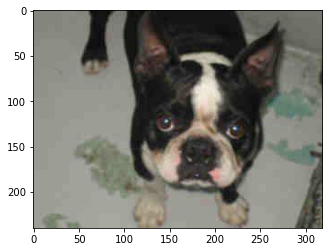

In [36]:
img_train = os.listdir(os.path.join(train_path))
sample = random.choice(img_names)
img = load_img(train_path+'/' + sample)
plt.imshow(img)
plt.show()

In [37]:
# getting labels

labels = []

for img in img_train:
    if(img.split(".")[0] == "dog"):
        labels.append("Dog")
    else:
        labels.append("Cat")

df = pd.DataFrame({"Image" : img_train , "Label" : labels})
df.head()

,Image,Label
0,cat.0.jpg,Cat
1,cat.1.jpg,Cat
2,cat.10.jpg,Cat
3,cat.100.jpg,Cat
4,cat.1000.jpg,Cat


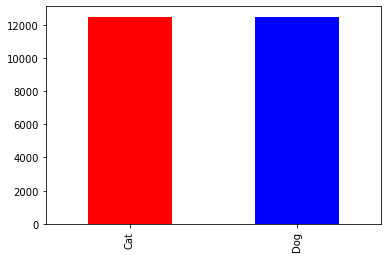

In [39]:
df.Label.value_counts().plot.bar(color = ['Red','BLue'])
plt.show()


### Modeling

In [49]:
##Split training and testing data
train = train_data[:-500]
test = train_data[-500:]

In [51]:
##Create data arrays, split into feature and response 
trainX = np.array([i[0] for i in train]).reshape(-1,img_size,img_size,1) 
trainX = flatten_features(trainX)
trainY = [i[1] for i in train]
trainY = reshape_response(trainY)

testX = np.array([i[0] for i in test]).reshape(-1,img_size,img_size,1)
testX = flatten_features(testX)
testY = [i[1] for i in test]
testY = reshape_response(testY)

In [52]:
#import the model from sklearn
from sklearn.linear_model import LogisticRegression

#Make an instance of the model
logit = LogisticRegression()

#Fit a model on the training data
logit.fit(trainX,trainY.ravel())

#Predict labels for the new data 
predictions = logit.predict(testX)


C:\Users\Prashita\anacondaMay\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [53]:
#Measure Model Performance: accuracy score 
score = logit.score(testX,testY)
print(score)

0.532


In [54]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

[[125 132]
 [102 141]]


Text(0.5, 1.0, 'Accuracy Score: 0.532')

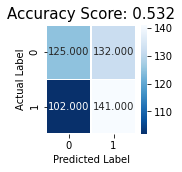

In [55]:
#Confusion Matrix
cm = metrics.confusion_matrix(testY, predictions)
print(cm)

#Seaborn Confusion Matrix 
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, cmap= 'Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

## Conclusion

Thus the whole project was a learning experience, as it provided a platform to work with an interesting dataset and the freedom and enough guidance to explore it through visualizations. 

Image classification is a huge task in and itself due the 

 

## References:

1. https://www.kaggle.com/c/dogs-vs-cats/data
